In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000814184"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000814184
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,TCF FINANCIAL CORP
Ticker,


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,64.0,1.061281e+01,2.224151e+00,6.850000e+00,8.930000e+00,1.038000e+01,1.266750e+01,1.493000e+01
interest income,65.0,2.244851e+08,3.420769e+07,1.489190e+08,2.159290e+08,2.316580e+08,2.409950e+08,3.032450e+08
net income,67.0,4.116124e+07,4.497653e+07,-2.828940e+08,3.042550e+07,4.742600e+07,6.118650e+07,9.765300e+07
net interest income,67.0,1.707338e+08,4.995179e+07,1.198000e+05,1.354595e+08,1.742860e+08,2.047250e+08,2.509070e+08
provision for loan losses,65.0,2.610226e+07,2.402942e+07,-3.436000e+06,4.656000e+06,1.760700e+07,4.705000e+07,9.627500e+07
total revenue,4.0,1.344888e+08,1.550293e+08,2.325000e+05,2.332500e+05,1.337972e+08,2.680528e+08,2.701280e+08


# Plots

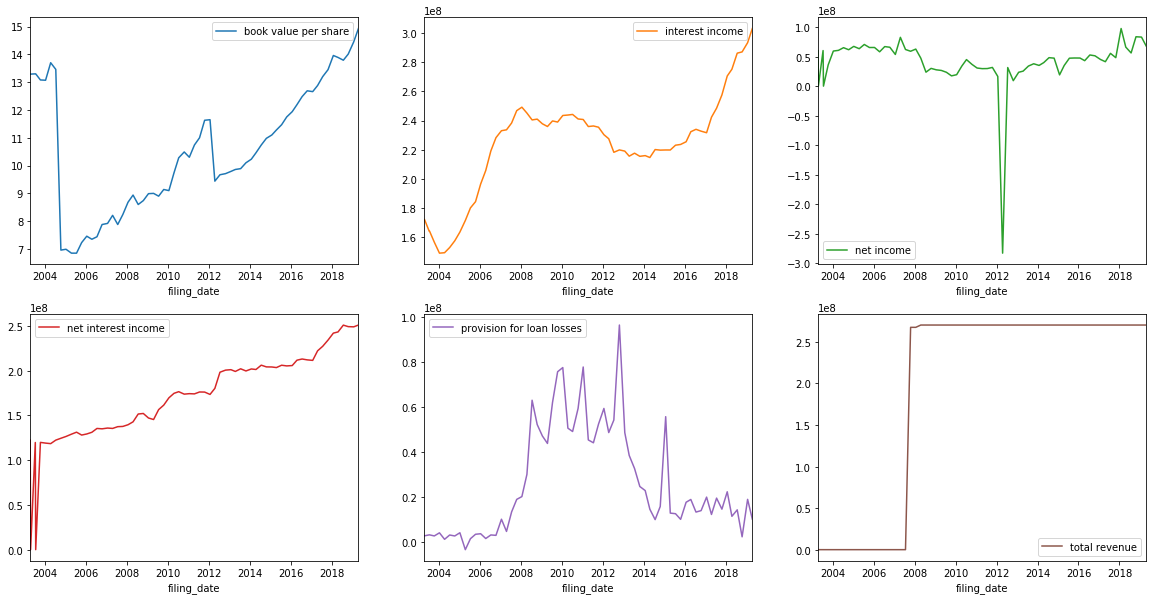

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                            
0000814184 book value per share                        2005Q2    missing   
           net income             2003Q1 to 2003Q2: 2 periods  duplicate   
           net interest income    2003Q1 to 2003Q2: 2 periods  duplicate   
           total revenue         2003Q3 to 2007Q2: 16 periods    missing   
           total revenue                               2007Q4    missing   
           total revenue         2008Q2 to 2019Q1: 44 periods    missing   

                                          message  
cik        item                                    
0000814184 book value per share    Missing period  
           net income            Duplicate period  
           net interest income   Duplicate period  
           total revenue           Missing period  
           total revenue           Missing period  
           total revenue           Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()